In [1]:
# SAX Method implementation

import numpy as np
import pandas as pd
import math
import string
import scipy.stats as sp
import matplotlib.pyplot as plt

In [2]:
ts = np.array([7, 4.7, 3.3, 2, 1.2, 2.2, 3.6, 5.5, 8.8, 9, 8, 4, 2.2, 1.4, 1.3])

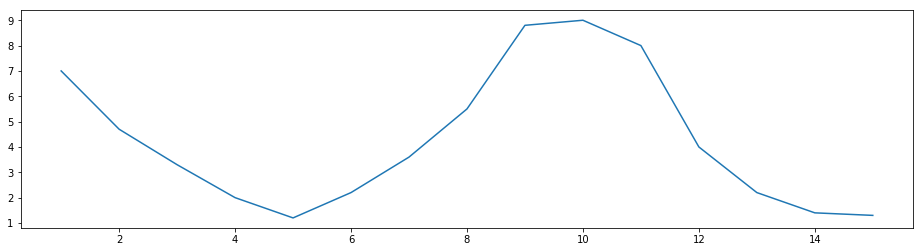

In [3]:
#Originl time series
plt.figure(figsize=(16, 4))
plt.plot(range(1,16),ts)
plt.show()

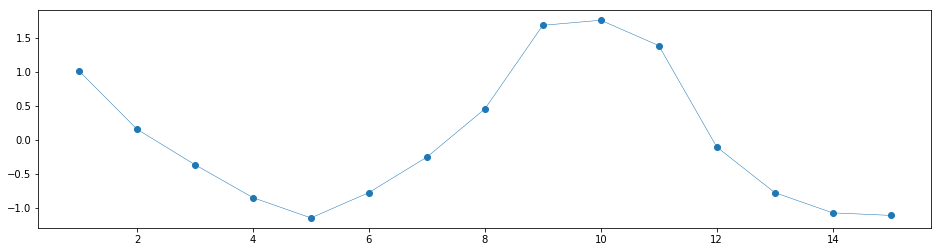

In [4]:
#Normalize time series input
plt.figure(figsize=(16, 4))
ts_norm = (ts - np.mean(ts)) / np.std(ts)
plt.plot(range(1,16),ts_norm,marker="o", linewidth=0.5)
plt.show()

In [24]:
#Perform Piecewise Aggregate Approximation with segment length = 7

segments = 7
ts_len = len(ts_norm)
#print(series_len)
if(ts_len == segments):
    res = ts_norm
else:
    res = np.zeros(segments)
    if(ts_len % segments == 0):
        quo = ts_len / segments
        for i in range(0, ts_len):
            ind = i // quo
            np.add.at(res, ind, ts_norm[i])
        
        res = res / quo
        
    else:
        for i in range(0, ts_len * segments):
            ind = i // ts_len
            j = i // segments
            np.add.at(res, ind, ts_norm[j])
            
        res = res / ts_len

print(res)

[ 0.5226598  -0.69687974 -0.79643399  0.59483663  1.62273425 -0.17421993
 -1.07269702]


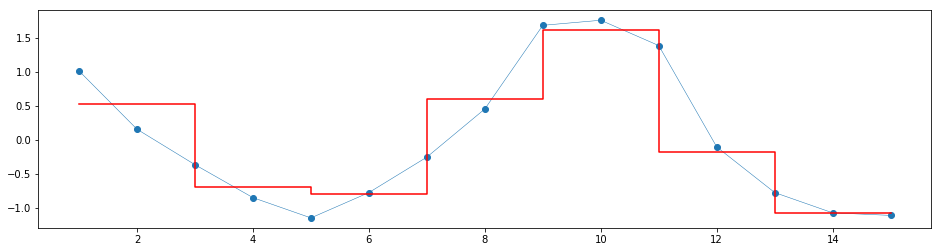

In [25]:
plt.figure(figsize=(16, 4))
ts_norm = (ts - np.mean(ts)) / np.std(ts)
plt.plot(range(1,16),ts_norm,marker="o", linewidth=0.5)
plt.step([1, 3, 5, 7, 9, 11, 13, 15], np.insert(res, 0, res[0]),color="red")
plt.show()

In [26]:
#Convert timeseries to string

sax = list()
symbols = string.ascii_lowercase

regs = np.arange(0, segments, 1) / segments
eqregs = sp.norm.ppf(regs)

Len = len(eqregs)

for i in range(0, len(res)):
    val = res[i]
    if val >= 0:
        k = Len - 1
        while ((k > 0) and (eqregs[k] >= val)):
            k = k - 1     
        sax.append(symbols[k])  
    else:
        k = 1
        while ((k < Len) and (eqregs[k] <= val)):
            k = k + 1
        sax.append(symbols[k])  
        
stringRes = ''.join(sax)

print("\nOutput string of time series-ts : %s\n" % stringRes) 


Output string of time series-ts : eccfgeb



In [ ]:
# 
# References - Online tutorials for SAX algorithm and PAA
#